In [12]:
#First i am going to import the libraries

import pandas as pd #open source data analysis tool
import seaborn as sns #python data visualisation library
import numpy as np

import matplotlib #library for making static, animated data visualisations
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #This is to adjust the configuration of the plots that i create

#I need to bring the data in by:

df = pd.read_csv(r"C:\Users\Leon's Laptop\Documents\movies.csv")

In [23]:
#Lets take a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
#I want to see if theres any missing data
#shows us the percentage of data that is missing (is null) within each category

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [14]:
#Some basic data cleaning
#I'm gonna look at the data types of my columns just to gage an understanding

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
#I'm going to change the data type of the budget column

#DataFrame is is too big for this to work:

#df['budget'] = df['budget'].astype('int64')

#df['gross'] = df['gross'].astype('int64')

#Therefore we use fillna as an alternative:

df = df.fillna(0)
df.budget = df.budget.astype(int)
df.gross = df.gross.astype(int)
df.votes = df.votes.astype(int)

In [38]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [58]:
#I'm going to order the data by gross revenue in desc order

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df

    


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,July
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,June
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,Seven Minutes in Heaven,PG-13,Comedy,1985,"May 9, 1985 (United States)",6.1,1500,Linda Feferman,Jane Bernstein,Jennifer Connelly,United States,0,0,Fifteen,88.0,May
342,Sleepaway Camp,R,Horror,1983,"November 18, 1983 (United States)",6.3,28000,Robert Hiltzik,Robert Hiltzik,Felissa Rose,United States,350000,0,American Eagle Films,84.0,Nove
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,Apri


In [57]:
#instead of showing all the rows (7k+) i am only going to show 20.
pd.set_option('display.max_rows', 20)

In [93]:
#Now one part of the data cleaning, i am going to delete the duplicates from the company column.
#But in order to do this, we need to convert the company to a string datatype and then delete the duplicates

df['company'] = df['company'].astype(str)
df.drop_duplicates(subset=['company']) 
df = df.sort_values(by=['company'], inplace=False, ascending=True)


In [94]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
4345,A Man Apart,R,Action,2003,"April 4, 2003 (United States)",6.1,46000,F. Gary Gray,Christian Gudegast,Vin Diesel,United States,36000000,44350926,"""DIA"" Productions GmbH & Co. KG",109.0,Apri
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112.0,Janu
3024,Schizopolis,Not Rated,Comedy,1996,"April 9, 1997 (United States)",6.8,5300,Steven Soderbergh,Steven Soderbergh,Steven Soderbergh,United States,250000,10580,.406 Production,96.0,Apri
7657,Leap,0,Drama,2020,"September 25, 2020 (United States)",6.7,903,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,0,25818882,0,135.0,Sept
3748,Yi Yi,Not Rated,Drama,2000,"December 16, 2000 (Japan)",8.2,22000,Edward Yang,Edward Yang,Nien-Jen Wu,Taiwan,0,1196218,1+2 Seisaku Iinkai,173.0,Dece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,Dope,R,Adventure,2015,"June 19, 2015 (United States)",7.2,82000,Rick Famuyiwa,Rick Famuyiwa,Shameik Moore,United States,7000000,17986781,i am OTHER,103.0,June
4007,The Deep End,R,Crime,2001,"August 31, 2001 (United States)",6.6,11000,Scott McGehee,Elisabeth Sanxay Holding,Tilda Swinton,United States,3000000,10031529,i5 Films,101.0,Augu
6412,The Inevitable Defeat of Mister & Pete,R,Drama,2013,"January 25, 2013 (United States)",7.5,5300,George Tillman Jr.,Michael Starrbury,Skylan Brooks,United States,0,506303,iDeal Partners Film Fund,108.0,Janu
5664,Incendies,R,Drama,2010,"January 12, 2011 (France)",8.3,158000,Denis Villeneuve,Denis Villeneuve,Lubna Azabal,Canada,6800000,7099598,micro_scope,131.0,Janu


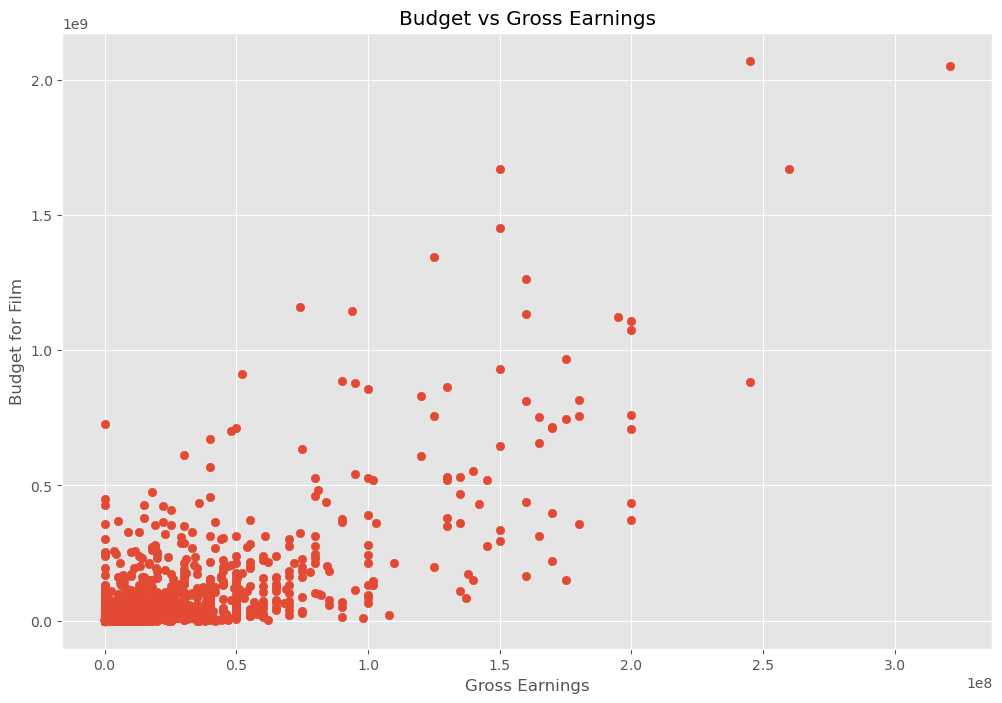

In [98]:
 #Gathering all of the data so far my hypothesis is that the most reputable the company is, the higher the budget they have the higher the gross they also have
 #The best way to look at a relationshop is through a scatter graph   
#We are going to compare budget with the gross

df= df.sort_values(by=['gross'], inplace=False, ascending=False)
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

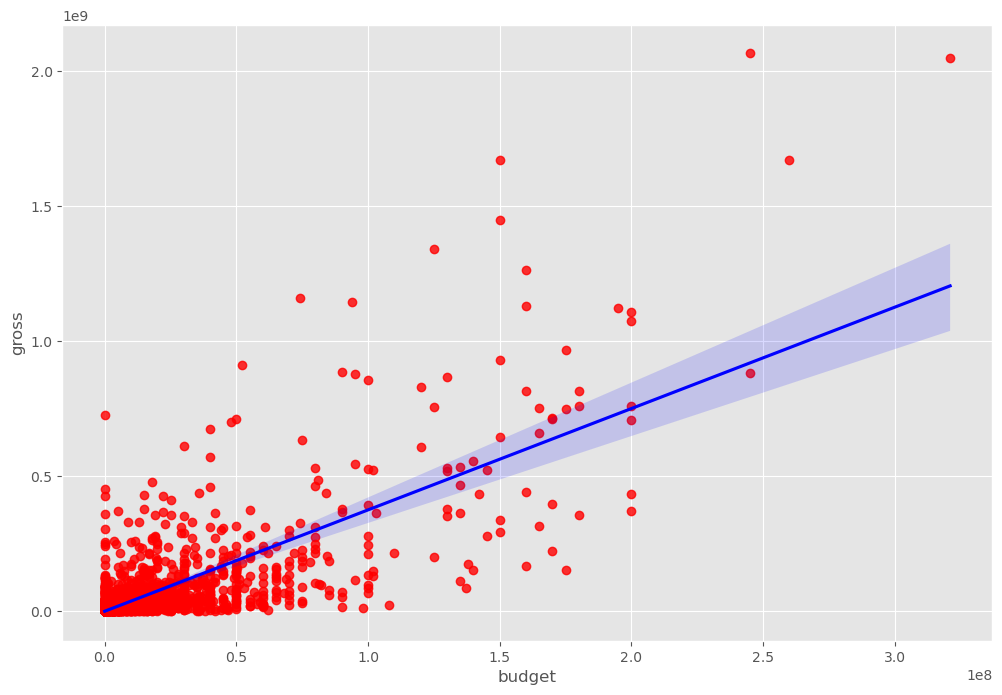

In [104]:
#I am going to plot the budget vs gross using seaborn. Will give me a better understanding of the correlation

sns.regplot(x='budget', y='gross', data=df, scatter_kws= {"color": "red"}, line_kws= {"color": "blue"})

In [109]:
#Now im going to look at the correlation. I can see from the visuals that it is positive. But to what extent?

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.108469,0.191010,0.206973,0.215073,0.105222
score,0.108469,1.000000,0.363515,0.018685,0.140640,0.384774
votes,0.191010,0.363515,1.000000,0.449958,0.589417,0.239286
budget,0.206973,0.018685,0.449958,1.000000,0.751916,0.176513
gross,0.215073,0.140640,0.589417,0.751916,1.000000,0.166283
runtime,0.105222,0.384774,0.239286,0.176513,0.166283,1.000000


In [110]:
#High correlation is shown between the budget and the gross earnings

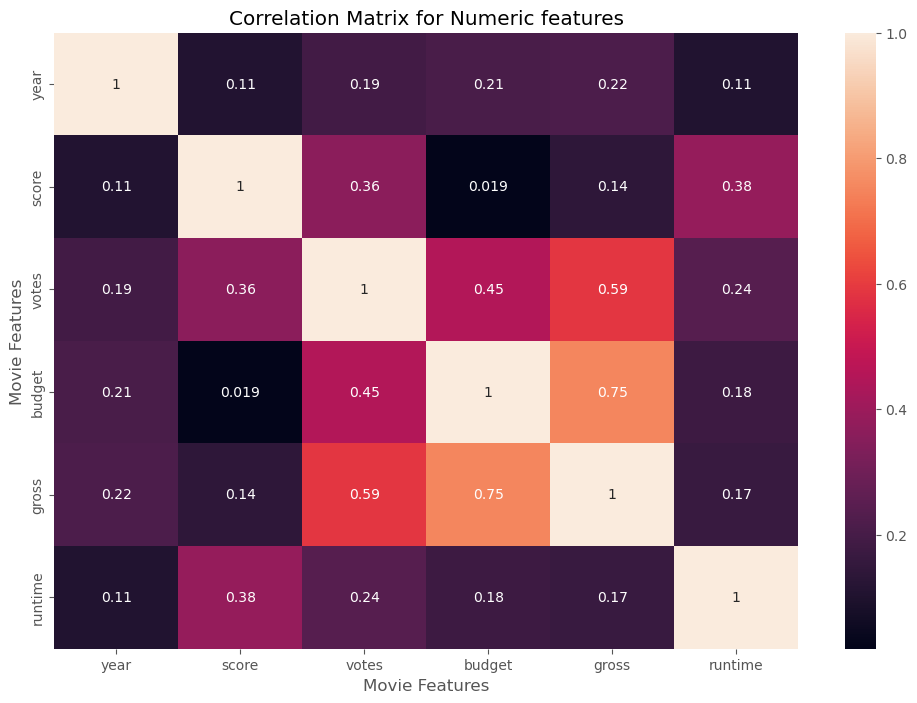

In [112]:
#Let's put the correlation of all aspects of the data into a matrix, so that we can gain a clear understanding
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [115]:
#I am now going to look at the company now

df_numerized = df

for col_name in df_numerized.columns: 
    if(df_numerized [col_name].dtype=='object'):
        df_numerized [col_name] = df_numerized [col_name].astype('category')
        df_numerized [col_name] = df_numerized [col_name].cat.codes
        
df_numerized   

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,1630,5,0,2015,382,7.8,876000,621,1098,281,51,245000000,2069521700,1541,138.0,9
7244,154,5,0,2018,120,8.4,897000,89,328,1243,51,321000000,2048359754,1607,149.0,7
7480,1972,4,2,2019,799,6.9,222000,807,830,360,51,260000000,1670727580,2317,118.0,12
6653,931,5,0,2015,891,7.0,593000,282,1544,237,51,150000000,1670516444,2282,124.0,13
7494,675,4,2,2019,1404,6.8,148000,241,844,846,51,150000000,1450026933,2316,103.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,491,6,0,1983,778,4.9,300,1201,1042,1556,51,3000000,0,1098,95.0,12
7667,1709,0,10,2020,226,5.7,7,1232,1435,1376,40,0,0,1788,102.0,8
66,1186,4,4,1980,473,8.1,12000,1634,1893,1518,42,900000,0,1675,150.0,10
49,1026,4,3,1980,1180,8.3,15000,1130,402,92,28,35000000,0,1012,173.0,15


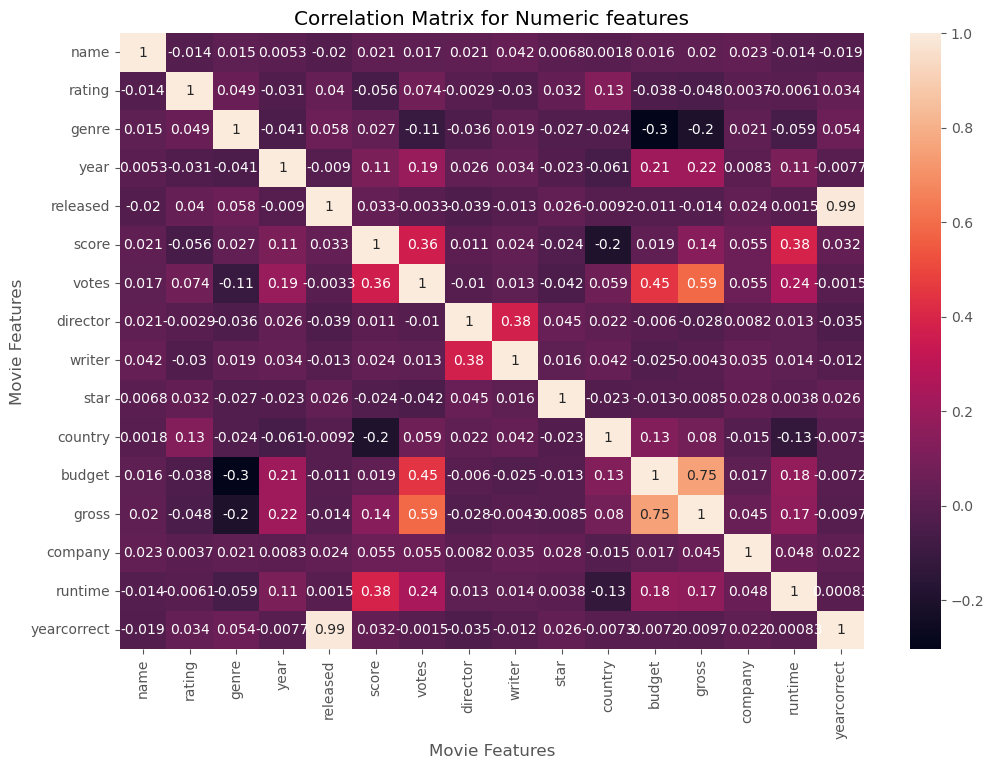

In [116]:
#Using a corr matrix, we can see in greater detail the correlations of each variable
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [117]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.014016,0.015405,0.005257,-0.019525,0.020871,0.016643,0.020676,0.041526,0.006782,0.001804,0.016041,0.020174,0.022807,-0.014257,-0.019265
rating,-0.014016,1.000000,0.048900,-0.030547,0.039532,-0.055861,0.074284,-0.002940,-0.029683,0.031585,0.130134,-0.038026,-0.047502,0.003682,-0.006077,0.033921
genre,0.015405,0.048900,1.000000,-0.040885,0.057767,0.026843,-0.106023,-0.036402,0.018532,-0.026719,-0.024367,-0.303546,-0.203880,0.020505,-0.059450,0.053697
year,0.005257,-0.030547,-0.040885,1.000000,-0.008959,0.108469,0.191010,0.026126,0.034217,-0.022732,-0.060607,0.206973,0.215073,0.008256,0.105222,-0.007686
released,-0.019525,0.039532,0.057767,-0.008959,1.000000,0.033122,-0.003349,-0.038730,-0.013040,0.025713,-0.009201,-0.011049,-0.013749,0.024153,0.001524,0.993778
score,0.020871,-0.055861,0.026843,0.108469,0.033122,1.000000,0.363515,0.011207,0.023768,-0.023651,-0.200244,0.018685,0.140640,0.054653,0.384774,0.032147
votes,0.016643,0.074284,-0.106023,0.191010,-0.003349,0.363515,1.000000,-0.010113,0.012905,-0.041999,0.059432,0.449958,0.589417,0.055205,0.239286,-0.001496
director,0.020676,-0.002940,-0.036402,0.026126,-0.038730,0.011207,-0.010113,1.000000,0.378724,0.044808,0.022049,-0.006032,-0.028048,0.008168,0.012634,-0.035406
writer,0.041526,-0.029683,0.018532,0.034217,-0.013040,0.023768,0.012905,0.378724,1.000000,0.016390,0.041872,-0.024992,-0.004251,0.034569,0.014425,-0.012485
star,0.006782,0.031585,-0.026719,-0.022732,0.025713,-0.023651,-0.041999,0.044808,0.016390,1.000000,-0.022660,-0.013223,-0.008536,0.027924,0.003825,0.026050


In [119]:
#I want to organise this so i can see the highest correlations easily

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.014016
             genre          0.015405
             year           0.005257
             released      -0.019525
                              ...   
yearcorrect  budget        -0.007186
             gross         -0.009691
             company        0.022242
             runtime        0.000832
             yearcorrect    1.000000
Length: 256, dtype: float64

In [120]:
#This is an important way to investigate the direct correlations between to variables
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.303546
genre        budget        -0.303546
gross        genre         -0.203880
genre        gross         -0.203880
country      score         -0.200244
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [124]:
#by doing the high correlations, it is a quick way to see which correlations are strongly correlated
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.589417
votes        gross          0.589417
budget       gross          0.751916
gross        budget         0.751916
yearcorrect  released       0.993778
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 22, dtype: float64

In [ ]:
#Can see that votes and budgets have the highest correlation to gross